In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("Titanic.csv")

In [3]:
df.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
df.columns

Index(['sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who',
       'alone', 'survived'],
      dtype='object')

In [6]:
cols = ['sex', 'embarked', 'class', 'who', 'alone']

In [7]:
for i in cols:
    le = LabelEncoder()
    a = le.fit_transform(df[i])
    df[i] = a

In [8]:
df.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,1,22.0,1,0,7.2500,2,2,1,0,0
1,0,38.0,1,0,71.2833,0,0,2,0,1
2,0,26.0,0,0,7.9250,2,2,2,1,1
3,0,35.0,1,0,53.1000,2,0,2,0,1
4,1,35.0,0,0,8.0500,2,2,1,1,0


In [21]:
X = df.drop("survived", axis = 1)
y = df.survived

In [22]:
X.head(2)

,sex,age,sibsp,parch,fare,embarked,class,who,alone
0,1,22.0,1,0,7.2500,2,2,1,0
1,0,38.0,1,0,71.2833,0,0,2,0


In [23]:
y.head(2)

0    0
1    1
Name: survived, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [14]:
model = LogisticRegression()

In [15]:
df.isna().sum()

sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
alone         0
survived      0
dtype: int64

In [16]:
df.describe()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.647587,29.699118,0.523008,0.381594,32.204208,1.538721,1.308642,1.210999,0.602694,0.383838
std,0.477990,14.526497,1.102743,0.806057,49.693429,0.794231,0.836071,0.594291,0.489615,0.486592
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,7.910400,1.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000,2.000000,1.000000,1.000000,0.000000
75%,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000,2.000000,2.000000,1.000000,1.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,2.000000,2.000000,1.000000,1.000000


In [17]:
df.fillna(df.mean(), inplace=True)

In [18]:
df.isna().sum()

sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
class       0
who         0
alone       0
survived    0
dtype: int64

In [19]:
df.describe()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.647587,29.699118,0.523008,0.381594,32.204208,1.538721,1.308642,1.210999,0.602694,0.383838
std,0.477990,13.002015,1.102743,0.806057,49.693429,0.794231,0.836071,0.594291,0.489615,0.486592
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000,2.000000,1.000000,1.000000,0.000000
75%,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000,2.000000,2.000000,1.000000,1.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,2.000000,2.000000,1.000000,1.000000


In [26]:
model.fit(X_train, y_train)

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
y_pred = model.predict_proba(X_test)

In [28]:
y_pred

array([[0.08105913, 0.91894087],
       [0.3096652 , 0.6903348 ],
       [0.3886998 , 0.6113002 ],
       [0.6601047 , 0.3398953 ],
       [0.11781073, 0.88218927],
       [0.58037666, 0.41962334],
       [0.87380412, 0.12619588],
       [0.3242654 , 0.6757346 ],
       [0.72114855, 0.27885145],
       [0.11190847, 0.88809153],
       [0.8780914 , 0.1219086 ],
       [0.0851504 , 0.9148496 ],
       [0.92714363, 0.07285637],
       [0.90708462, 0.09291538],
       [0.86858612, 0.13141388],
       [0.62156952, 0.37843048],
       [0.92369452, 0.07630548],
       [0.03804829, 0.96195171],
       [0.18864347, 0.81135653],
       [0.88940562, 0.11059438],
       [0.88658924, 0.11341076],
       [0.91055922, 0.08944078],
       [0.92936072, 0.07063928],
       [0.88970253, 0.11029747],
       [0.93144129, 0.06855871],
       [0.32933478, 0.67066522],
       [0.88240174, 0.11759826],
       [0.59435458, 0.40564542],
       [0.77090901, 0.22909099],
       [0.03929027, 0.96070973],
       [0.

In [29]:
from sklearn.metrics import roc_auc_score, roc_curve

In [30]:
fpr, tpr, th = roc_curve(y_test, y_pred[:,1], pos_label=1)

In [32]:
print("FPR", fpr)
print("TPR", tpr)
print("Threshold", th)

FPR [0.         0.         0.         0.00900901 0.00900901 0.02702703
 0.02702703 0.03603604 0.03603604 0.03603604 0.03603604 0.04504505
 0.04504505 0.06306306 0.06306306 0.06306306 0.06306306 0.06306306
 0.07207207 0.07207207 0.09009009 0.09009009 0.13513514 0.13513514
 0.15315315 0.15315315 0.18018018 0.18018018 0.2972973  0.2972973
 0.36936937 0.36936937 0.37837838 0.37837838 0.3963964  0.40540541
 0.43243243 0.43243243 0.4954955  0.52252252 0.54054054 0.54954955
 0.55855856 0.55855856 0.63963964 0.66666667 0.78378378 0.78378378
 0.81981982 0.81981982 0.97297297 0.97297297 1.        ]
TPR [0.         0.01470588 0.17647059 0.17647059 0.51470588 0.51470588
 0.57352941 0.57352941 0.58823529 0.61764706 0.63235294 0.63235294
 0.64705882 0.64705882 0.67647059 0.69117647 0.72058824 0.73529412
 0.73529412 0.76470588 0.76470588 0.79411765 0.79411765 0.80882353
 0.80882353 0.82352941 0.82352941 0.83823529 0.83823529 0.85294118
 0.85294118 0.86764706 0.86764706 0.88235294 0.88235294 0.8970588

In [33]:
random_proba = [0 for i in range(len(y_test))]

In [34]:
random_proba

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [35]:
p_fpr, p_tpr, p_th = roc_curve(y_test, random_proba, pos_label=1)

In [36]:
print("FPR", p_fpr)
print("TPR", p_tpr)
print("Threshold", p_th)

FPR [0. 1.]
TPR [0. 1.]
Threshold [inf  0.]


In [37]:
auc_score = roc_auc_score(y_test, y_pred[:,1])

In [38]:
auc_score

0.8820879703232645

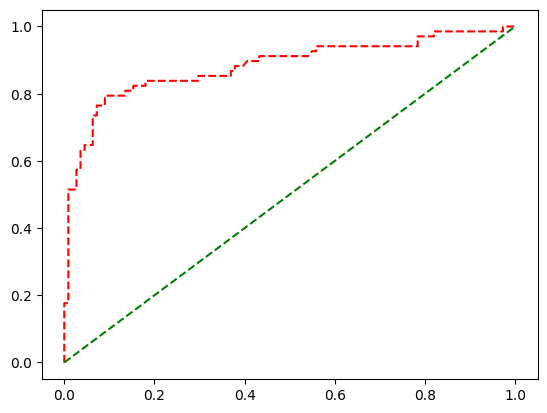

In [39]:
plt.plot(fpr, tpr, "r--")
plt.plot(p_fpr, p_tpr, "g--")
plt.show()